In [1]:
#!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=258582eb0e24c18ed22ca23d22630c47451092f3bde3d3ef22bf5306c0170ed1
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName('DB_Final_Project').getOrCreate()


: 

In [2]:
spark


In [ ]:
from pyspark.pandas import DataFrame as psdf
import pyspark.pandas as ps
df = ps.DataFrame({'mass': [0.330, 4.87, 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
df.plot.pie(y='mass')
print(type(df))

: 

In [3]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [38]:
taxi = spark.read\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .parquet("/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-01.parquet",
             "/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-02.parquet",
             "/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-03.parquet",
             "/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-04.parquet",
             "/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-05.parquet",
             "/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-06.parquet",
             "/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-07.parquet",
             "/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-08.parquet",
             "/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-09.parquet",
             "/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-10.parquet",
             "/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-11.parquet",
             "/content/drive/MyDrive/yellow_tripdata_2022/yellow_tripdata_2022-12.parquet")

In [ ]:
taxi = spark.read\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .parquet("yellow_tripdata_2022\yellow_tripdata_2022-01.parquet",\
             "yellow_tripdata_2022\yellow_tripdata_2022-02.parquet",\
             "yellow_tripdata_2022\yellow_tripdata_2022-03.parquet",\
             "yellow_tripdata_2022\yellow_tripdata_2022-04.parquet",\
             "yellow_tripdata_2022\yellow_tripdata_2022-05.parquet",\
             "yellow_tripdata_2022\yellow_tripdata_2022-06.parquet",\
             "yellow_tripdata_2022\yellow_tripdata_2022-07.parquet",\
             "yellow_tripdata_2022\yellow_tripdata_2022-08.parquet",\
             "yellow_tripdata_2022\yellow_tripdata_2022-09.parquet",\
             "yellow_tripdata_2022\yellow_tripdata_2022-10.parquet",\
             "yellow_tripdata_2022\yellow_tripdata_2022-11.parquet",\
             "yellow_tripdata_2022\yellow_tripdata_2022-12.parquet",\
             )

In [6]:
taxi.printSchema()


root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)



In [ ]:
taxi.show(5)


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       1| 2022-10-01 00:03:41|  2022-10-01 00:18:39|            1.0|          1.7|       1.0|                 N|         249|         107|           1|        9.5|  3.0|    0.5|      2.6

In [39]:
pickup_hour = taxi.select(hour(col("tpep_pickup_datetime")).alias("hour"),
                          month(col("tpep_pickup_datetime")).alias("month"),
                          date_format("tpep_pickup_datetime",
                                      "MMM").alias("Month_Name")
                          )

TypeError: ignored

In [16]:
peak_hour = pickup_hour.groupBy("hour", "month", "Month_Name").count()
peak_hour = peak_hour.drop("Month_Name")
peak_hour.show()

+----+-----+------+
|hour|month| count|
+----+-----+------+
|   5|   10| 23995|
|  15|   10|221062|
|  11|    3|182886|
|  15|    3|227087|
|   4|    3| 19131|
|  16|   10|223547|
|   3|    3| 28722|
|   2|   10| 50730|
|   0|    3| 93826|
|   4|    4| 18932|
|   3|   10| 33943|
|   0|    4| 97264|
|   8|   10|139161|
|   6|    3| 56491|
|  18|   10|254715|
|   2|    1| 29197|
|  23|    2|113557|
|  21|    9|173990|
|  22|    3|175689|
|  23|    4|141392|
+----+-----+------+
only showing top 20 rows



In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
hour = peak_hour.toPandas()
hour_m = hour.pivot(index='month', columns='hour', values='count')
print(hour_m)

hour       0      1      2      3      4      5      6       7       8   \
month                                                                     
1       60091  42318  29197  19306  12831  14443  36208   74137  101528   
2       77916  52125  36769  24526  15656  16296  45378   88971  117704   
3       93826  61472  38500  28722  19131  21751  56491  109770  145612   
4       97264  63599  42332  25491  18932  21499  53611  101860  135056   
5      101906  65739  42650  27727  19737  24285  58705  106025  135436   
6      102816  66545  44968  28877  20420  24313  57069  103995  137102   
7       94695  62194  42871  28511  18997  21731  49831   83277  116167   
8       88388  57477  38190  24752  17128  20446  51306   86708  122067   
9       92771  59574  39041  26004  18123  21984  53927   98674  123767   
10     107232  71729  50730  33943  22473  23995  55194  105121  139161   
11      84884  58514  35593  23554  17125  20759  50033   93402  122717   
12     101227  64773  431

In [35]:
month_names = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

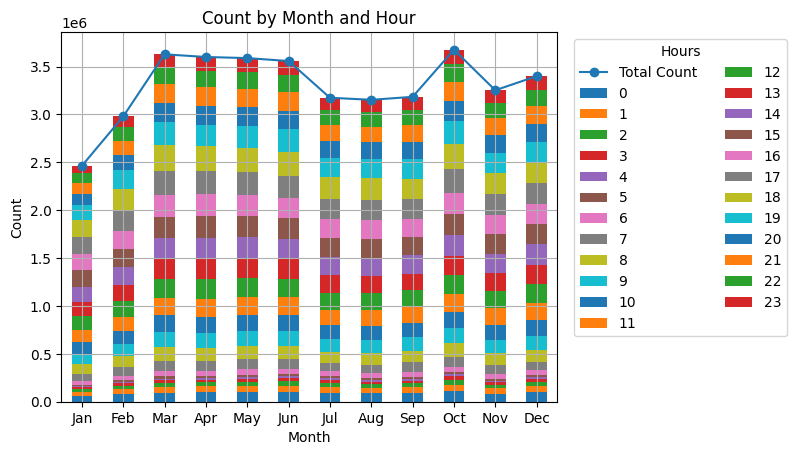

In [36]:
hour_m.index = hour_m.index.map(month_names)

hour_m.plot(kind='bar', stacked=True)

hour_m['Total_Count'] = hour_m.sum(axis=1)

# Plot the total count line
plt.plot(hour_m.index, hour_m['Total_Count'],
         marker='o', linestyle='-', label='Total Count')
# Plot customization
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Hours', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2)
plt.title('Count by Month and Hour')
plt.xticks(rotation=0)

# Display the plot
plt.show()

peak hour : 18
off-peak hour : 4


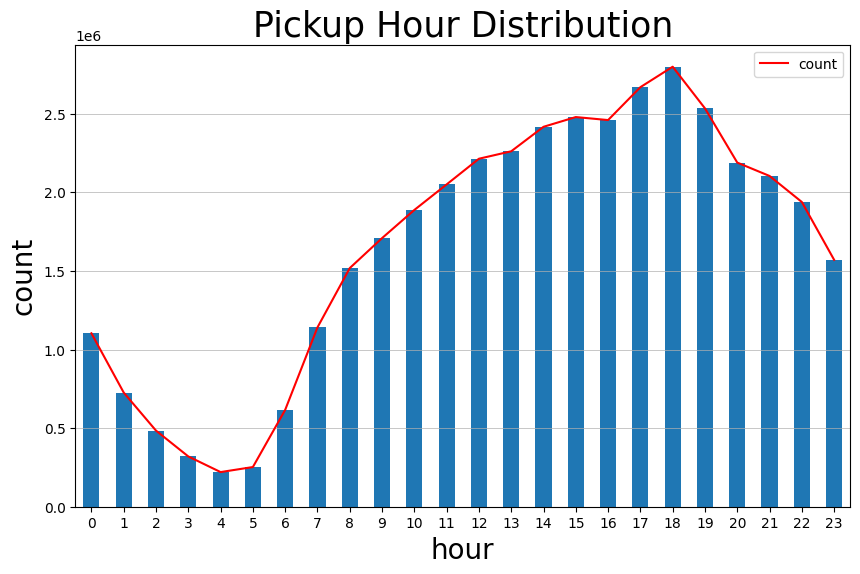

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
peak_hour_pd = peak_hour.sort("hour").toPandas()

print("peak hour :", peak_hour_pd.idxmax()[1])
print("off-peak hour :", peak_hour_pd.idxmin()[1])
ax = peak_hour_pd.plot.bar(x="hour", y="count", rot=0,
                           legend=False, figsize=(10, 6))
peak_hour_pd.plot.line("hour", ax=ax, color="red", label=".")
plt.title("Pickup Hour Distribution", fontsize=25)
plt.xlabel("hour", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.grid(axis='y', linewidth=0.5)
plt.show()

In [43]:
peak_month = pickup_hour.select("Month_Name", "month").groupBy(
    "Month_Name", "month").count().sort("month")
peak_month = peak_month.drop("month")
peak_month.show()

+----------+-------+
|Month_Name|  count|
+----------+-------+
|       Jan|2463959|
|       Feb|2979420|
|       Mar|3627888|
|       Apr|3599903|
|       May|3588292|
|       Jun|3557692|
|       Jul|3174363|
|       Aug|3152695|
|       Sep|3183784|
|       Oct|3675812|
|       Nov|3252670|
|       Dec|3399620|
+----------+-------+



In [55]:
month = peak_month.pandas_api().set_index("Month_Name")
month.plot.pie(y="count")

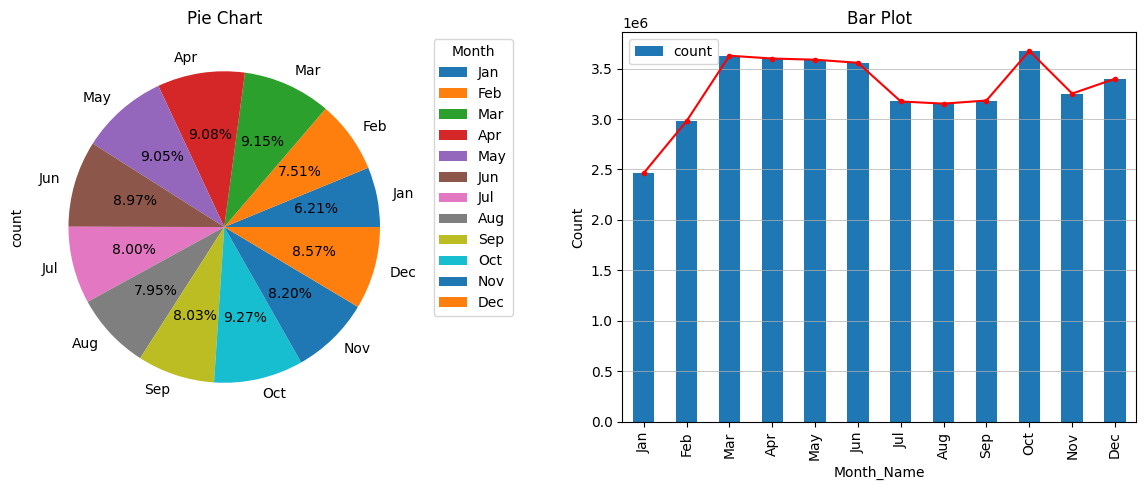

In [83]:
month_pd = peak_month.toPandas()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot pie chart
month_pd.plot.pie(
    y='count', labels=month_pd['Month_Name'], autopct='%1.2f%%', ax=axes[0])
axes[0].set_title('Pie Chart')
axes[0].legend(title='Month', bbox_to_anchor=(1.02, 1), loc='upper left')

# Plot bar plot
month_pd.plot.bar(x='Month_Name', y='count', ax=axes[1])
axes[1].plot(month_pd['count'], color='r', marker='.')
axes[1].set_title('Bar Plot')
axes[1].set_xlabel('Month_Name')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linewidth=0.5)
# Adjust layout spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()